In [1]:
# Render our plots inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Make the graphs a bit prettier, and bigger
pd.options.display.mpl_style = 'default'
plt.rcParams['figure.figsize'] = (15, 5)

First we get the results from the MTurk Tracker API.

In [2]:
import requests
import json
from pandas.tseries.tools import to_datetime

url1 = "https://crowd-power.appspot.com/_ah/api/mturk/v1/arrivalCompletions/list?from=06%2F01%2F2014&to=02%2F28%2F2015"
resp = requests.get(url1)
results1 = json.loads(resp.text)
url2 = "https://crowd-power.appspot.com/_ah/api/mturk/v1/arrivalCompletions/list?from=03%2F01%2F2015&to=07%2F20%2F2015"
resp = requests.get(url2)
results2 = json.loads(resp.text)

In [3]:
results = []
results.extend(results1["hourly"])
results.extend(results2["hourly"])
len(results)

9909

In [4]:
df = pd.DataFrame(results)
df

,from,hitGroupsArrived,hitGroupsAvailableUI,hitGroupsCompleted,hitsArrived,hitsAvailableUI,hitsCompleted,id,length,rewardsArrived,rewardsCompleted,to
0,2014-06-01T00:00:00.000Z,48,3204.677966,57,3541,239546.932203,4044,6571931635548160,60,64727,60312,2014-06-01T01:00:00.000Z
1,2014-06-01T01:00:00.000Z,54,3199.379310,46,2983,233281.086207,4780,4754317850443776,60,36213,43690,2014-06-01T02:00:00.000Z
2,2014-06-01T02:00:00.000Z,31,3159.810345,32,2534,229269.241379,3417,5915488834027520,60,29566,39952,2014-06-01T03:00:00.000Z
3,2014-06-01T03:00:00.000Z,29,3147.350877,15,2152,225204.526316,4595,4816444988588032,60,35688,40214,2014-06-01T04:00:00.000Z
4,2014-06-01T04:00:00.000Z,53,3144.482759,35,1924,220964.310345,6048,5516508551708672,60,52469,66224,2014-06-01T05:00:00.000Z
5,2014-06-01T05:00:00.000Z,74,3147.810345,63,11759,219456.603448,5220,6114132145209344,60,94891,43261,2014-06-01T06:00:00.000Z
6,2014-06-01T06:00:00.000Z,33,3129.483333,58,2279,221918.550000,5808,6001175209967616,60,41191,46881,2014-06-01T07:00:00.000Z
7,2014-06-01T07:00:00.000Z,19,3154.847458,9,5804,220310.966102,3570,5438225256546304,60,31924,35788,2014-06-01T08:00:00.000Z
8,2014-06-01T08:00:00.000Z,16,3130.271186,19,2306,219645.220339,5021,6223498655563776,60,16692,42713,2014-06-01T09:00:00.000Z
9,2014-06-01T09:00:00.000Z,13,3127.017241,15,1056,214703.275862,5872,5785263546564608,60,18701,33530,2014-06-01T10:00:00.000Z


We then modify the dataframe to remove unecessary columns and we do some conversions.

In [5]:
# Create an index using the "from" date, and drop the from/to columns
df['date'] = map(to_datetime, df['from'])
df.set_index(['date'], inplace=True)
df.drop(["from"],inplace=True,axis=1)
df.drop(["to"],inplace=True,axis=1)

# Convert HIT measurements to floats
df['hitsArrived'] = df['hitsArrived'].astype(float)
df['hitsCompleted'] = df['hitsCompleted'].astype(float)
df['hitsAvailableUI'] = df['hitsAvailableUI'].astype(float)

df['hitGroupsArrived'] = df['hitGroupsArrived'].astype(float)
df['hitGroupsCompleted'] = df['hitGroupsCompleted'].astype(float)
df['hitGroupsAvailableUI'] = df['hitGroupsAvailableUI'].astype(float)

# Convert rewards to float, and convert cent values to dollars
df["rewardsCompleted"] = df['rewardsCompleted'].astype(float)
df["rewardsCompleted"] = map(lambda x: x/100, df["rewardsCompleted"])
df["rewardsArrived"] = df['rewardsArrived'].astype(float)
df["rewardsArrived"] = map(lambda x: x/100, df["rewardsArrived"])
df

,hitGroupsArrived,hitGroupsAvailableUI,hitGroupsCompleted,hitsArrived,hitsAvailableUI,hitsCompleted,id,length,rewardsArrived,rewardsCompleted
date,,,,,,,,,,
2014-06-01 00:00:00,48,3204.677966,57,3541,239546.932203,4044,6571931635548160,60,647.27,603.12
2014-06-01 01:00:00,54,3199.379310,46,2983,233281.086207,4780,4754317850443776,60,362.13,436.90
2014-06-01 02:00:00,31,3159.810345,32,2534,229269.241379,3417,5915488834027520,60,295.66,399.52
2014-06-01 03:00:00,29,3147.350877,15,2152,225204.526316,4595,4816444988588032,60,356.88,402.14
2014-06-01 04:00:00,53,3144.482759,35,1924,220964.310345,6048,5516508551708672,60,524.69,662.24
2014-06-01 05:00:00,74,3147.810345,63,11759,219456.603448,5220,6114132145209344,60,948.91,432.61
2014-06-01 06:00:00,33,3129.483333,58,2279,221918.550000,5808,6001175209967616,60,411.91,468.81
2014-06-01 07:00:00,19,3154.847458,9,5804,220310.966102,3570,5438225256546304,60,319.24,357.88
2014-06-01 08:00:00,16,3130.271186,19,2306,219645.220339,5021,6223498655563776,60,166.92,427.13


Our key tool for estimating the size of the market on Mechanical Turk is the fact that Amazon reports continuously the number of available HITs and HITgroups. At the same time, because we track each HITgroup independently over time, we can observe how many HITs were posted or consumed over a time period. By comparing these two independent estimates, we can see what we capture and what we miss. 

For example, if we see 1000 HITs being posted within an hour, and then 800 HITs being consumed, we estimate that the "available HITs" should increase by 200. If the difference reported by Mechanical Turk is 400, then it means that for that period we "missed" 200/400=50% of the HIT activity.

Below, we create a new column called `diffHits` that is our own estimate of how the `HITs available` counter should change. By summing up the diffHits value, we can estimate how the `HITs available` should change.

In [6]:
df["diffHits"] = map(lambda x,y: x-y, df['hitsArrived'], df["hitsCompleted"])
df["hitsAvailableDerived"] = df["diffHits"].cumsum()

Let's plot the two values. The `hitsAvailableUI` contains the values reported by MTurk, and the `hitsAvailableDerived` is our own estimate.

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


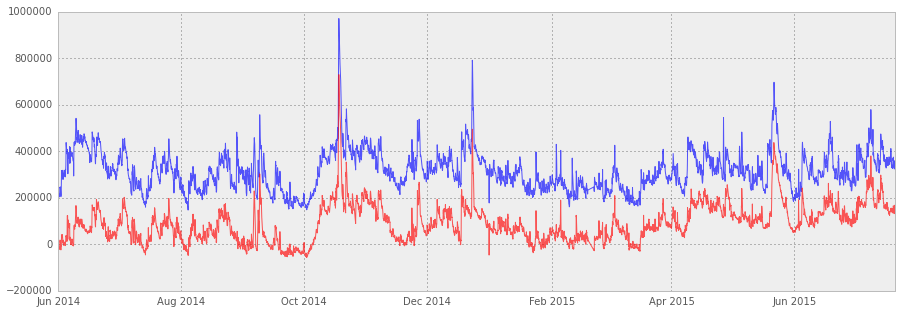

In [7]:
plt.figure()

realHITs = pd.Series(data = df["hitsAvailableUI"], index=df.index)
plt.plot(realHITs.index,realHITs, 'b', alpha=0.65)

trackerHITs = pd.Series(data = df["hitsAvailableDerived"], index=df.index)
plt.plot(trackerHITs.index, trackerHITs, 'r', alpha=0.65)

The two lines seem to evolve in pretty similar ways. To aling them better, we can add in the `hitsAvailableDerived` time series the number of HITs that were already available in the market on June 1st (which was the first day of the data set)

In [8]:
hitsOnJune1st = 239546.932203
df["hitsAvailableDerived"] = df["diffHits"].cumsum() + hitsOnJune1st

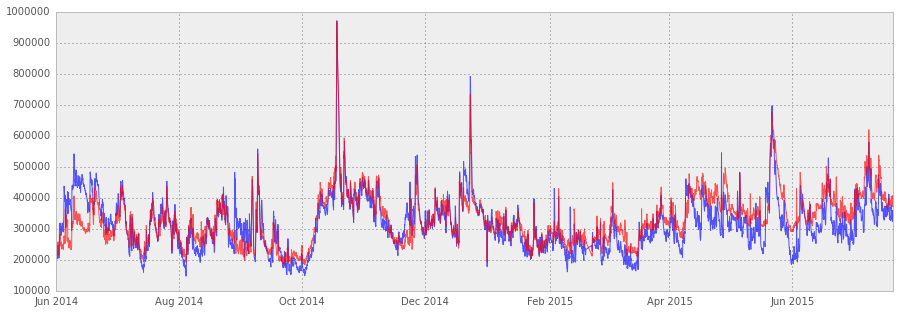

In [9]:
plt.figure()

realHITs = pd.Series(data = df["hitsAvailableUI"], index=df.index)
plt.plot(realHITs.index,realHITs, 'b', alpha=0.65)

trackerHITs = pd.Series(data = df["hitsAvailableDerived"], index=df.index)
plt.plot(trackerHITs.index, trackerHITs, 'r', alpha=0.65)

The two lines seem to have very similar behavior. However, before studying their cross-correlation, we need to first remove any auto-correlation within the time series.

Our lag and autocorrelation plots indicate a significant autocorrelation:

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


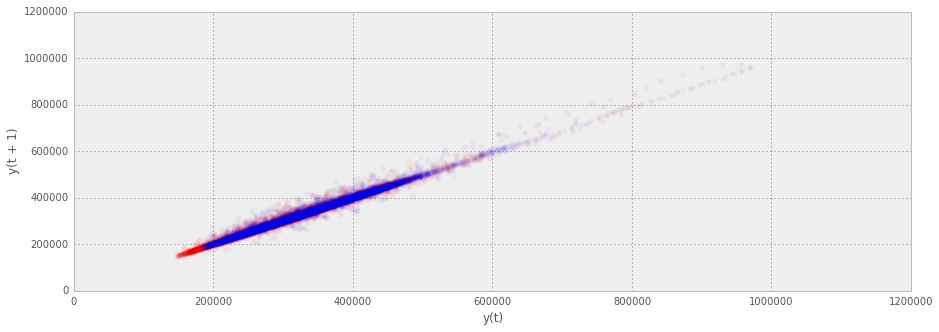

In [10]:
from pandas.tools.plotting import lag_plot
lag_plot(realHITs, color='r', alpha=0.05)
lag_plot(trackerHITs, color='b', alpha=0.05)

Similarly, the autocorrelation plot indicates that a significant degree of autocorrelation

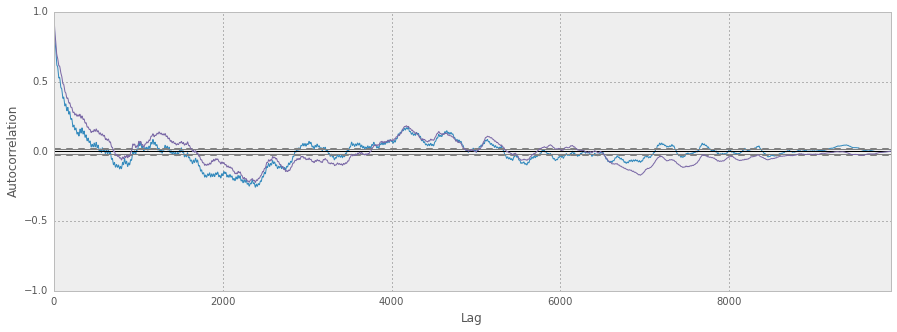

In [11]:
from pandas.tools.plotting import autocorrelation_plot

# The plot shows a strong weekly periodicity
autocorrelation_plot(realHITs)
autocorrelation_plot(trackerHITs)

By taking first differentials, the situation improves considerably.

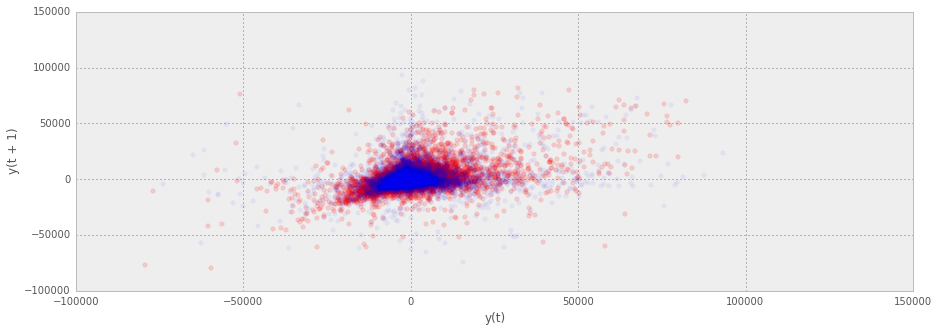

In [12]:
lag_plot(realHITs.diff(), color='r', alpha=0.15)
lag_plot(trackerHITs.diff(), color='b', alpha=0.05)

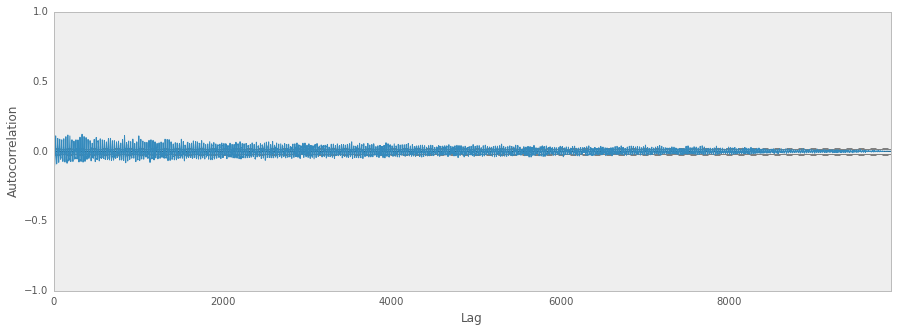

In [13]:
autocorrelation_plot(realHITs.diff()[1:])

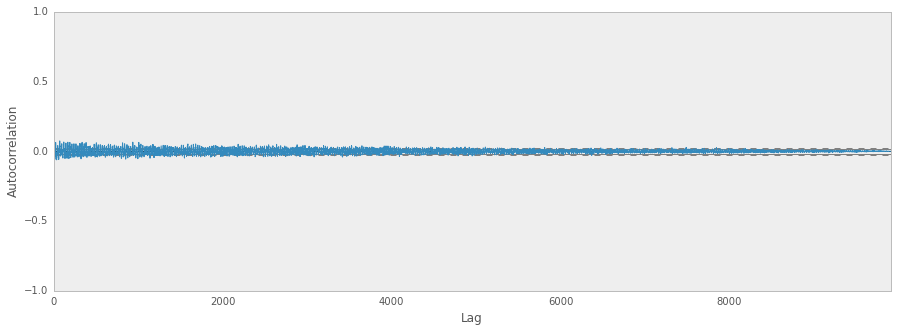

In [14]:
autocorrelation_plot(trackerHITs.diff()[1:])

At this point, we are reasonably confident that the two time series have minimal degree of autocorrelation.

In [15]:
# We construct a data frame with the differences, and we will then compute the cross correlation of the time series


In [16]:
r = pd.Series(data = realHITs.diff()[1:], name="ActualDiff")
c = pd.Series(data = trackerHITs.diff()[1:], name="EstimatedDiff")
s = pd.concat([r, c], axis=1)
s

,ActualDiff,EstimatedDiff
date,,
2014-06-01 01:00:00,-6265.845996,-1797
2014-06-01 02:00:00,-4011.844828,-883
2014-06-01 03:00:00,-4064.715064,-2443
2014-06-01 04:00:00,-4240.215971,-4124
2014-06-01 05:00:00,-1507.706897,6539
2014-06-01 06:00:00,2461.946552,-3529
2014-06-01 07:00:00,-1607.583898,2234
2014-06-01 08:00:00,-665.745763,-2715
2014-06-01 09:00:00,-4941.944477,-4816


Now, we plot the joint distribution of the two variables:

                            OLS Regression Results                            
Dep. Variable:          EstimatedDiff   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     7348.
Date:                Thu, 22 Oct 2015   Prob (F-statistic):               0.00
Time:                        19:25:12   Log-Likelihood:            -1.0204e+05
No. Observations:                9908   AIC:                         2.041e+05
Df Residuals:                    9906   BIC:                         2.041e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.9820     72.176      0.124      0.9

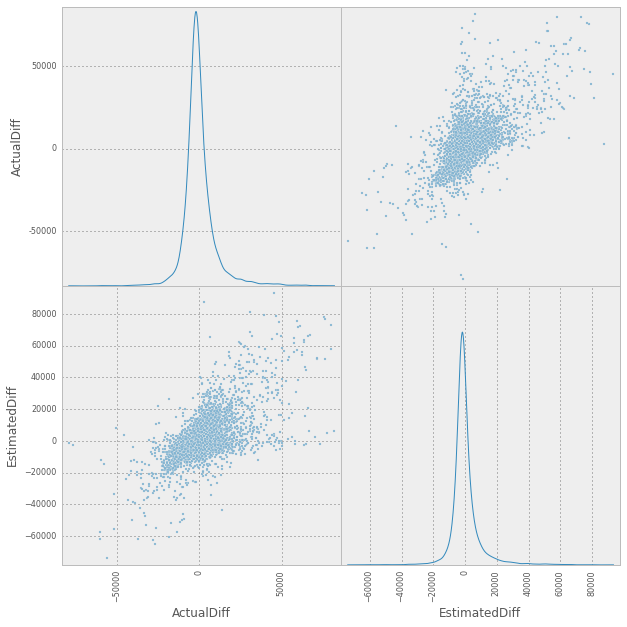

In [17]:
from pandas.tools.plotting import scatter_matrix
import statsmodels.formula.api as sm

scatter_matrix(s[["ActualDiff", "EstimatedDiff" ]], alpha=0.9, figsize=(10, 10), diagonal='kde')
result = sm.ols(formula="EstimatedDiff ~ ActualDiff", data=s).fit()

print result.summary()

In [18]:
import numpy as np

gs = s.groupby(lambda x: x.date).aggregate(np.sum)
gs[:10]

,ActualDiff,EstimatedDiff
2014-06-01,1938.796610,17494
2014-06-02,75620.627119,20832
2014-06-03,-11125.796610,-35618
2014-06-04,59477.898305,34115
2014-06-05,217.857188,65832
2014-06-06,-7947.469987,-71113
2014-06-07,37561.827586,-8152
2014-06-08,37629.775862,57579
2014-06-09,108832.206897,83381
2014-06-10,-68964.921839,-48838


                            OLS Regression Results                            
Dep. Variable:          EstimatedDiff   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     802.1
Date:                Thu, 22 Oct 2015   Prob (F-statistic):           1.22e-98
Time:                        19:25:13   Log-Likelihood:                -4852.1
No. Observations:                 413   AIC:                             9708.
Df Residuals:                     411   BIC:                             9716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    187.2339   1510.481      0.124      0.9

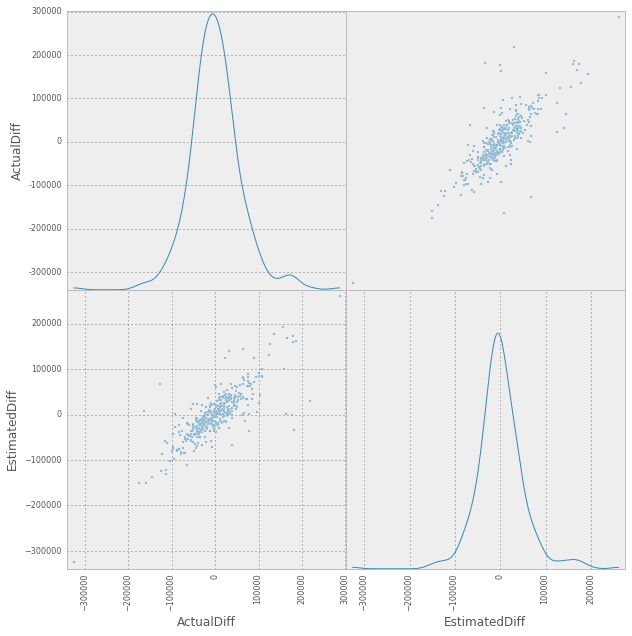

In [19]:
scatter_matrix(gs[["ActualDiff", "EstimatedDiff" ]], alpha=0.9, figsize=(10, 10), diagonal='kde')

result = sm.ols(formula="EstimatedDiff ~ ActualDiff", data=gs).fit()

print result.summary()